# Demographics and Business Demographics of London Boroughs

### To do:
  * clean up datasets
  * visualizations:
    1. bar charts (stacked)
    2. cloropeth maps
    3. bubble charts for trends

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import folium
from folium import Choropleth
from folium.raster_layers import TileLayer
mpl.style.use('seaborn-bright')

# Preparing the datasets

#### Demographics data

In [48]:
business_dem = pd.read_csv('datasets/business-demographics.csv',usecols=[1,2,3,4,5,6],nrows=816,keep_default_na=False)

In [49]:
print(business_dem.shape)
business_dem.dtypes

(816, 6)


area                   object
year                    int64
active_enterprises     object
births                 object
birth_rate            float64
deaths                 object
dtype: object

In [50]:
business_dem['active_enterprises'] = business_dem['active_enterprises'].apply(lambda x: x.replace(',','')).astype('int')
business_dem['births'] = business_dem['births'].apply(lambda x: x.replace(',','')).astype('int')
business_dem['deaths'] = business_dem['deaths'].apply(lambda x: x.replace(',','')).astype('int')
business_dem.dtypes

area                   object
year                    int64
active_enterprises      int64
births                  int64
birth_rate            float64
deaths                  int64
dtype: object

#### Employment status by gender

In [51]:
emp = pd.read_excel('datasets/employment-status-by-genderxls.xlsx',sheet_name='2019',header=[0,1],nrows=33)
emp.columns.to_frame()

0  \
Code                                               Unnamed: 0_level_1                                               Code   
Area                                               Unnamed: 1_level_1                                               Area   
% in employment who are employees - working age    number                % in employment who are employees - working age   
                                                   denominator           % in employment who are employees - working age   
                                                   percent               % in employment who are employees - working age   
                                                   confidence            % in employment who are employees - working age   
% in employment who are self employed - working... number              % in employment who are self employed - workin...   
                                                   denominator         % in employment who are self employed - workin...   
                                                   percent             % in employment who are self employed - workin...   
                                                   confidence          % in employment who are self employed - workin...   
% in employment working full-time - working age    number                % in employment working full-time - working age   
                                                   denominator           % in employment working full-time - working age   
                                                   percent               % in employment working full-time - working age   
                                                   confidence            % in employment working full-time - working age   
% in employment working part-time - working age    number                % in employment working part-time - working age   
                                                   denominator           % in employment working part-time - working age   
                                                   percent               % in employment working part-time - working age   
                                                   confidence            % in employment working part-time - working age   
% of males in employment rate working full-time... number              % of males in employment rate working full-tim...   
                                                   denominator         % of males in employment rate working full-tim...   
                                                   percent             % of males in employment rate working full-tim...   
                                                   confidence          % of males in employment rate working full-tim...   
% of males in employment rate working part-time... number              % of males in employment rate working part-tim...   
                                                   denominator         % of males in employment rate working part-tim...   
                                                   percent             % of males in employment rate working part-tim...   
                                                   confidence          % of males in employment rate working part-tim...   
% of females in employment rate working full-ti... number              % of females in employment rate working full-t...   
                                                   denominator         % of females in employment rate working full-t...   
                                                   percent             % of females in employment rate working full-t...   
                                                   confidence          % of females in employment rate working full-t...   
% of females in employment rate working part-ti... number              % of females in employment rate working part-t...   
                                                   denominator         % of females in employment rate working part-t...   
                           

In [52]:
emp.drop(columns=['Code'],axis=1,inplace=True)
emp.rename(columns={'% in employment who are employees - working age': 'Total Employees', '% in employment who are self employed - working age': 'Total Self-employed', '% in employment working full-time - working age': 'Full time employees', '% in employment working part-time - working age': 'Part time employees', '% of males in employment rate working full-time - working age': 'Males full time', '% of males in employment rate working part-time - working age': 'Males part time', '% of females in employment rate working full-time - working age': 'Females full time', '% of females in employment rate working part-time - working age': 'Females part time'}, inplace=True)

/Users/robertczikkel/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [53]:
emp.rename(columns={'Area':'','Unnamed: 1_level_1':'Area'},inplace=True)

In [54]:
emp.isna().sum()

                     Area           0
Total Employees      number         0
                     denominator    0
                     percent        0
                     confidence     0
Total Self-employed  number         0
                     denominator    0
                     percent        0
                     confidence     0
Full time employees  number         0
                     denominator    0
                     percent        0
                     confidence     0
Part time employees  number         0
                     denominator    0
                     percent        0
                     confidence     0
Males full time      number         0
                     denominator    0
                     percent        0
                     confidence     0
Males part time      number         0
                     denominator    0
                     percent        0
                     confidence     0
Females full time    number         0
            

In [55]:
emp.dtypes

                     Area            object
Total Employees      number           int64
                     denominator      int64
                     percent        float64
                     confidence      object
Total Self-employed  number          object
                     denominator      int64
                     percent         object
                     confidence      object
Full time employees  number           int64
                     denominator      int64
                     percent        float64
                     confidence      object
Part time employees  number          object
                     denominator      int64
                     percent         object
                     confidence      object
Males full time      number           int64
                     denominator      int64
                     percent        float64
                     confidence      object
Males part time      number          object
                     denominator

In [56]:
emp.replace('!',0,inplace=True)
emp.replace('-',0,inplace=True)
emp.replace('*',0,inplace=True)

In [57]:
for col in emp.iloc[:,1:].columns:
    emp[col] = emp[col].astype(float)
emp.head()

Total Employees                                 \
                   Area          number denominator percent confidence   
0        City of London          7400.0      7400.0   100.0        0.0   
1  Barking and Dagenham         79900.0     95800.0    83.4        4.4   
2                Barnet        153900.0    191500.0    80.3        4.6   
3                Bexley         97400.0    118600.0    82.2        4.0   
4                 Brent        125000.0    160800.0    77.7        5.6   

  Total Self-employed                                Full time employees  ...  \
               number denominator percent confidence              number  ...   
0                 0.0      7400.0     0.0        0.0              7400.0  ...   
1             15900.0     95800.0    16.6        4.4             71700.0  ...   
2             34800.0    191500.0    18.2        4.4            147000.0  ...   
3             20800.0    118600.0    17.5        3.9             91900.0  ...   
4             35200.0    160800.0    21.9        5.6            125600.0  ...   

  Males part time            Females full time                                 \
          percent confidence            number denominator percent confidence   
0             0.0        0.0               0.0         0.0     0.0        0.0   
1             7.4        4.3           23700.0     44000.0    53.9        8.3   
2            12.4        5.4           59000.0     91200.0    64.8        7.8   
3             7.6        3.9           36800.0     58100.0    63.3        7.0   
4            14.4        6.8           46900.0     68900.0    68.2        8.7   

  Females part time                                 
             number denominator percent confidence  
0               0.0         0.0     0.0        0.0  
1           20300.0     44000.0    46.1        8.3  
2           32100.0     91200.0    35.2        7.8  
3           21300.0     58100.0    36.7        7.0  
4           21900.0     68900.0    31.8        8.7  

[5 rows x 33 columns]

In [58]:
emp.dtypes

                     Area            object
Total Employees      number         float64
                     denominator    float64
                     percent        float64
                     confidence     float64
Total Self-employed  number         float64
                     denominator    float64
                     percent        float64
                     confidence     float64
Full time employees  number         float64
                     denominator    float64
                     percent        float64
                     confidence     float64
Part time employees  number         float64
                     denominator    float64
                     percent        float64
                     confidence     float64
Males full time      number         float64
                     denominator    float64
                     percent        float64
                     confidence     float64
Males part time      number         float64
                     denominator

#### Business sizes

In [59]:
business_size = pd.read_excel('datasets/enterprises-by-employment-size.xls',sheet_name='2020', header=2,nrows=33)
business_size.drop(columns=['Code'],axis=1, inplace=True)

In [60]:
print('Datatypes:\n', business_size.dtypes,'\n')
print('Shape:\n', business_size.shape,'\n')
print('NaN values:\n', business_size.isna().sum(),'\n')

Datatypes:
 Area          object
Total          int64
0 to 4         int64
5 to 9         int64
10 to 19       int64
20 to 49       int64
50 to 99       int64
100 to 249     int64
250 to 499     int64
500 to 999     int64
1000           int64
dtype: object 

Shape:
 (33, 11) 

NaN values:
 Area          0
Total         0
0 to 4        0
5 to 9        0
10 to 19      0
20 to 49      0
50 to 99      0
100 to 249    0
250 to 499    0
500 to 999    0
1000          0
dtype: int64 



In [61]:
cols = ['Area','Total','Micro 0-4', 'Small 5-9', 'Small 10-19', 'Medium 20-49', 'Medium 50-99', 'MediumLarge 100-249', 'Large 250-499', 'Big 500-999', 'Corporation 1000&up']
business_size.columns = cols

In [62]:
business_size.head()

Area  Total  Micro 0-4  Small 5-9  Small 10-19  \
0        City of London  24020      16775       2840         2040   
1  Barking and Dagenham   7225       6160        575          280   
2                Barnet  24615      21220       1930          860   
3                Bexley   8930       7490        760          360   
4                 Brent  15890      13350       1395          650   

   Medium 20-49  Medium 50-99  MediumLarge 100-249  Large 250-499  \
0          1120           580                  360            125   
1           120            50                   30              5   
2           350           130                   90             15   
3           190            70                   40             10   
4           285           100                   65             25   

   Big 500-999  Corporation 1000&up  
0           85                   90  
1            0                    5  
2           10                   10  
3            5                    5  
4           10                   10

#### Business survival rates

In [63]:
survival = pd.read_csv('datasets/business-survival-rates.csv')
survival = survival[['area','year','1_year_survival_number','1_year_survival_rate']]
survival = survival.groupby(['year']).get_group(2018)
survival.head()

area  year  1_year_survival_number  1_year_survival_rate
816        City of London  2018                    3950                  75.6
817  Barking and Dagenham  2018                    1415                  93.1
818                Barnet  2018                    3410                  84.4
819                Bexley  2018                    1205                  92.7
820                 Brent  2018                    2580                  89.4

In [64]:
print('Datatypes:\n', survival.dtypes,'\n')
print('Shape:\n', survival.shape,'\n')
print('NaN values:\n', survival.isna().sum(),'\n')

Datatypes:
 area                       object
year                        int64
1_year_survival_number      int64
1_year_survival_rate      float64
dtype: object 

Shape:
 (51, 4) 

NaN values:
 area                      0
year                      0
1_year_survival_number    0
1_year_survival_rate      0
dtype: int64 



#### Demographics of boroughs

In [65]:
demographics = pd.read_csv('datasets/london-borough-profiles.csv',encoding='cp1252',nrows=34)
demographics.columns

Index(['Code', 'Area_name', 'Inner/_Outer_London',
       'GLA_Population_Estimate_2017', 'GLA_Household_Estimate_2017',
       'Inland_Area_(Hectares)', 'Population_density_(per_hectare)_2017',
       'Average_Age,_2017', 'Proportion_of_population_aged_0-15,_2015',
       'Proportion_of_population_of_working-age,_2015',
       'Proportion_of_population_aged_65_and_over,_2015',
       'Net_internal_migration_(2015)', 'Net_international_migration_(2015)',
       'Net_natural_change_(2015)',
       '%_of_resident_population_born_abroad_(2015)',
       'Largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_largest_migrant_population_(2011)',
       'Second_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_second_largest_migrant_population_(2011)',
       'Third_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_third_largest_migrant_population_(2011)',
       '%_of_population_from_BAME_groups_(2016)',
       '%_people_aged_3+_whose_main_

In [66]:
demographics = demographics[['Area_name','GLA_Population_Estimate_2017','Population_density_(per_hectare)_2017','Proportion_of_population_aged_0-15,_2015','Proportion_of_population_of_working-age,_2015','Proportion_of_population_aged_65_and_over,_2015','%_of_resident_population_born_abroad_(2015)',]]
demographics.head()

Area_name  GLA_Population_Estimate_2017  \
0        City of London                          8800   
1  Barking and Dagenham                        209000   
2                Barnet                        389600   
3                Bexley                        244300   
4                 Brent                        332100   

   Population_density_(per_hectare)_2017  \
0                                   30.3   
1                                   57.9   
2                                   44.9   
3                                   40.3   
4                                   76.8   

   Proportion_of_population_aged_0-15,_2015  \
0                                      11.4   
1                                      27.2   
2                                      21.1   
3                                      20.6   
4                                      20.9   

   Proportion_of_population_of_working-age,_2015  \
0                                           73.1   
1                                           63.1   
2                                           64.9   
3                                           62.9   
4                                           67.8   

   Proportion_of_population_aged_65_and_over,_2015  \
0                                             15.5   
1                                              9.7   
2                                             14.0   
3                                             16.6   
4                                             11.3   

  %_of_resident_population_born_abroad_(2015)  
0                                           .  
1                                        37.8  
2                                        35.2  
3                                        16.1  
4                                        53.9

In [67]:
demographics.dtypes

Area_name                                           object
GLA_Population_Estimate_2017                         int64
Population_density_(per_hectare)_2017              float64
Proportion_of_population_aged_0-15,_2015           float64
Proportion_of_population_of_working-age,_2015      float64
Proportion_of_population_aged_65_and_over,_2015    float64
%_of_resident_population_born_abroad_(2015)         object
dtype: object

In [68]:
demographics['%_of_resident_population_born_abroad_(2015)'].replace('.',np.nan,inplace=True)
demographics['%_of_resident_population_born_abroad_(2015)'] = demographics['%_of_resident_population_born_abroad_(2015)'].astype('float32')

In [69]:
demographics.drop(index=33, inplace=True)

In [70]:
demographics.columns

Index(['Area_name', 'GLA_Population_Estimate_2017',
       'Population_density_(per_hectare)_2017',
       'Proportion_of_population_aged_0-15,_2015',
       'Proportion_of_population_of_working-age,_2015',
       'Proportion_of_population_aged_65_and_over,_2015',
       '%_of_resident_population_born_abroad_(2015)'],
      dtype='object')

In [71]:
new_cols = ['Area', 'PopulationEstimate', 'DensityPerHectare', 'Children%', 'Adults%', 'Elderly%', 'ForeignPopulation%']
demographics.columns = new_cols

In [72]:
print('Datatypes:\n', demographics.dtypes,'\n')
print('Shape:\n', demographics.shape,'\n')
print('NaN values:\n', demographics.isna().sum(),'\n')

Datatypes:
 Area                   object
PopulationEstimate      int64
DensityPerHectare     float64
Children%             float64
Adults%               float64
Elderly%              float64
ForeignPopulation%    float32
dtype: object 

Shape:
 (33, 7) 

NaN values:
 Area                  0
PopulationEstimate    0
DensityPerHectare     0
Children%             0
Adults%               0
Elderly%              0
ForeignPopulation%    1
dtype: int64 



# Visulizations

~~business_dem~~ <br>
~~business_size~~ <br>
~~survival~~ <br>
emp <br>
~~demographics~~ <br> 

In [73]:
geocoords = pd.read_csv('geo_coords.csv',index_col=0)
geocoords.head()

borough        lat        lon
0          camden  39.944840 -75.119891
1       islington  51.538429  -0.099905
2  city of london  51.515618  -0.091998
3         lambeth  51.501301  -0.117287
4          ealing  51.512655  -0.305195

## Demographics

<br>

In [74]:
demographics.head()

Area  PopulationEstimate  DensityPerHectare  Children%  \
0        City of London                8800               30.3       11.4   
1  Barking and Dagenham              209000               57.9       27.2   
2                Barnet              389600               44.9       21.1   
3                Bexley              244300               40.3       20.6   
4                 Brent              332100               76.8       20.9   

   Adults%  Elderly%  ForeignPopulation%  
0     73.1      15.5                 NaN  
1     63.1       9.7           37.799999  
2     64.9      14.0           35.200001  
3     62.9      16.6           16.100000  
4     67.8      11.3           53.900002

### Preparing data for geo.json

In [75]:
set(demographics['Area'])

{'Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'City of London',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster'}

In [76]:
set(geocoords['borough'])

{'barking and dagenham',
 'barnet',
 'bexley',
 'brent',
 'bromley',
 'camden',
 'city of london',
 'city of westminster',
 'croydon',
 'ealing',
 'enfield',
 'greenwich',
 'hackney',
 'hammersmith and fulham',
 'haringey',
 'harrow',
 'havering',
 'hillingdon',
 'hounslow',
 'islington',
 'kensington and chelsea',
 'kingston upon thames',
 'lambeth',
 'lewisham',
 'merton',
 'newham',
 'redbridge',
 'richmond upon thames',
 'southwark',
 'sutton',
 'tower hamlets',
 'waltham forest',
 'wandsworth'}

In [77]:
demographics['Area'] = demographics['Area'].str.lower()
demographics.loc[demographics['Area'] == 'westminster', 'Area'] = 'city of wesminster'
demographics.set_index('Area',inplace=True)

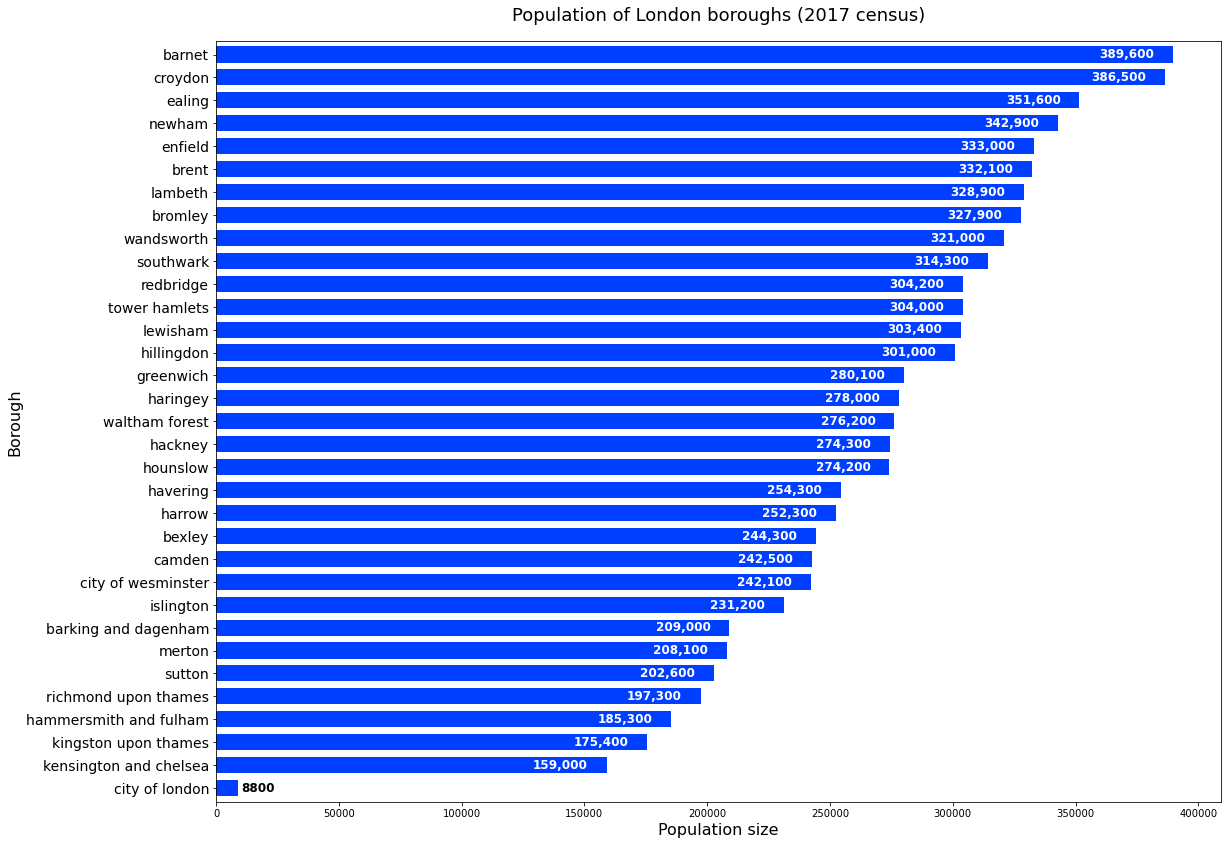

In [78]:
plt.figure(figsize=(18,14))
demographics['PopulationEstimate'].sort_values(ascending=True).plot(kind='barh', width=0.7)
for i, val in enumerate(demographics['PopulationEstimate'].sort_values(ascending=True)):
    label = format(int(val), ',')
    plt.annotate(label, xy=(val - 30000, i - 0.15), color='white', fontweight='bold', fontsize=12)
plt.annotate(8800, xy=(10000, 0-0.15), color='black', fontweight='bold', fontsize=12)
plt.title('Population of London boroughs (2017 census)',size=18,pad=20)
plt.xlabel('Population size', size=16)
plt.ylabel('Borough',size=16)
plt.yticks(size=14)
plt.show()

### Age demographics (stacked pct bar chart)

https://www.geeksforgeeks.org/stacked-percentage-bar-plot-in-matplotlib/

In [79]:
age = demographics.iloc[:,2:-1]
age.sort_index(ascending=False,inplace=True)
age.head()

Children%  Adults%  Elderly%
Area                                        
wandsworth           17.8     72.8       9.3
waltham forest       21.8     67.9      10.3
tower hamlets        20.1     73.9       6.0
sutton               20.7     64.3      15.1
southwark            18.6     73.5       7.9

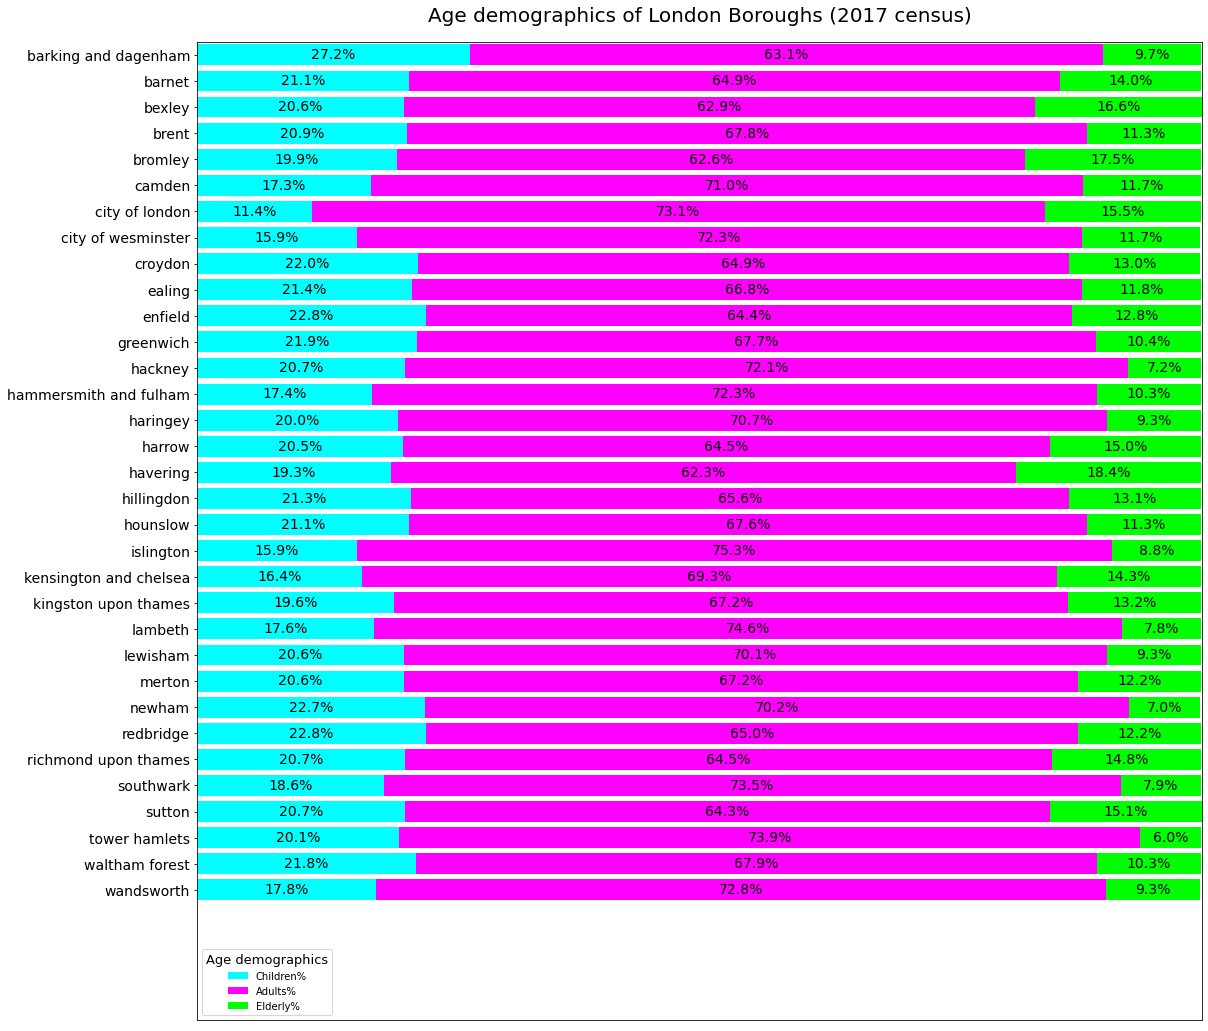

In [80]:
left = len(age) * [0]
colors = ['aqua', 'fuchsia', 'lime']
fig, ax = plt.subplots(1, figsize=(18,18))
for i, col in enumerate(age.columns):
    plt.barh(age.index, age[col], left=left, color=colors[i])
    left = left + age[col]
    
for n in age:
    for i, (cs, ab) in enumerate(zip(age.cumsum(1)[n], age[n])):
        plt.text(cs - ab / 2, i, str(np.round(ab, 1)) + '%', 
                                 va = 'center', ha = 'center',c='black', fontsize=14) 
        
plt.ylim(-5, ax.get_yticks()[-1] + 0.5)
plt.xlim(0.0, plt.xlim()[1] - 5)
plt.yticks(size=14)
plt.xticks([])
plt.legend(age.columns,title='Age demographics', loc='lower left', title_fontsize=13)
plt.title('Age demographics of London Boroughs (2017 census)',size=20, pad=20)
plt.show()

### Foreign population

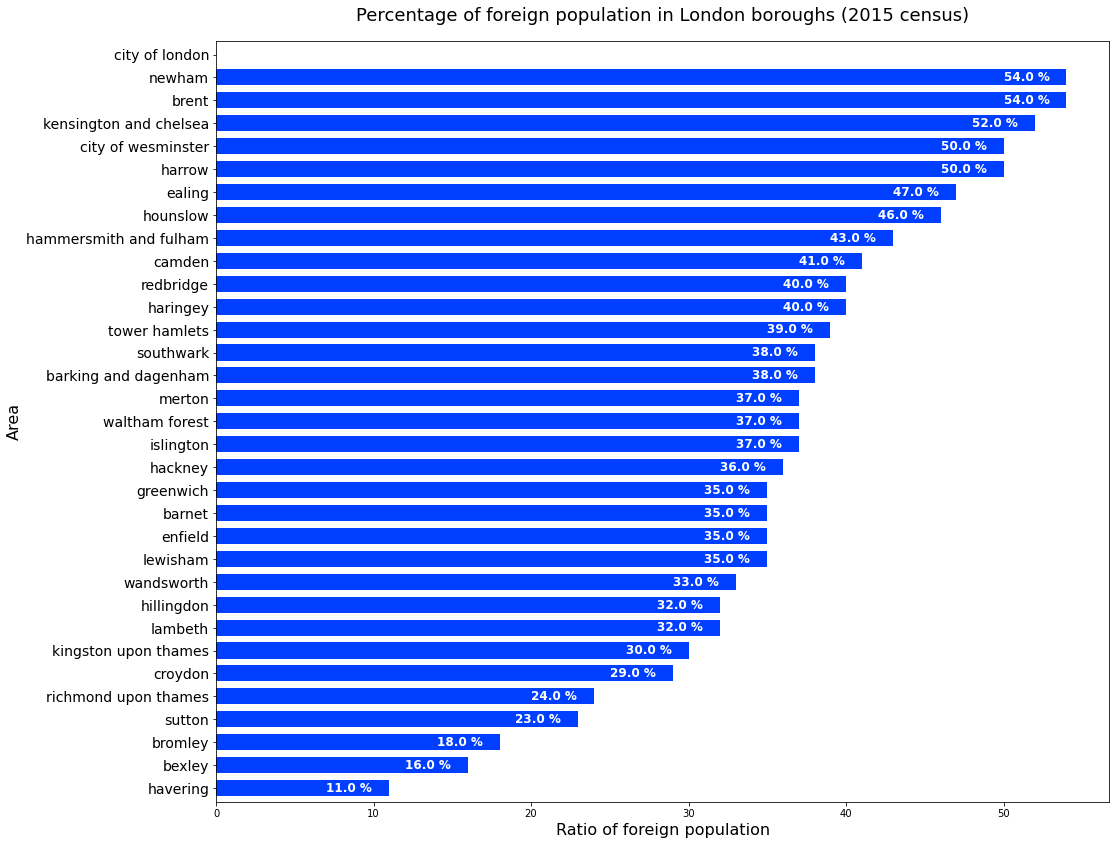

In [81]:
plt.figure(figsize=(16,14))
demographics['ForeignPopulation%'].sort_values(ascending=True).round(decimals=0).plot(kind='barh', width=0.7)
for i, val in enumerate(demographics['ForeignPopulation%'].sort_values(ascending=True).round(decimals=0)):
    label = str(val) + ' %'
    plt.annotate(label, xy=(val - 4, i - 0.15), color='white', fontweight='bold', fontsize=12)
    
plt.title('Percentage of foreign population in London boroughs (2015 census)', size=18,pad=20)
plt.yticks(size=14)
plt.ylabel('Area',size=16)
plt.xlabel('Ratio of foreign population', size=16)
plt.show()

### Cloropeths

In [82]:
import json
geo = json.load(open('london_boroughs.json'))
geo

{'type': 'FeatureCollection',
 'name': 'file23f9e20d355f2',
 'features': [{'type': 'Feature',
   'properties': {'id': 1,
    'name': 'kingston upon thames',
    'code': 'E09000021',
    'area_hectares': 3726.117,
    'inner_statistical': False},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-0.330679021892208, 51.3290110042255],
       [-0.330594407685802, 51.3290880335007],
       [-0.330506076800874, 51.3291488231289],
       [-0.330409170439833, 51.329208591193],
       [-0.330292080798994, 51.3292707692176],
       [-0.329913420922727, 51.3294605090526],
       [-0.329633553567758, 51.3296570521748],
       [-0.329428743782426, 51.3298420756319],
       [-0.329320874634715, 51.3299664328746],
       [-0.329214439571928, 51.3300908104757],
       [-0.329116282503008, 51.3302638658986],
       [-0.329112914697426, 51.330396008489],
       [-0.329171126657569, 51.3307295636276],
       [-0.329191261261383, 51.3309654559072],
       [-0.329302869489851, 51.331528183616

In [86]:
#demographics.reset_index(inplace=True)
map = folium.Map(location=[51.509865, -0.118092],  zoom_start=10.3, zoom_control=False)

bins = np.linspace(demographics['PopulationEstimate'].min(), demographics['PopulationEstimate'].max(), 10)
TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Light_Gray_Base/MapServer/tile/{z}/{y}/{x}',
    attr='Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ'
    ).add_to(map)

title_html = '''
             <h3 align="center" style="font-size:18px; margin:0; padding: 1px;"><b>Population Density by borough</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

population = Choropleth(
    geo_data = geo,
    data = demographics,
    control= False,
    columns= ['Area','PopulationEstimate'],
    key_on = 'feature.properties.name',
    fill_color='BuPu', 
    fill_opacity=1, 
    line_opacity=0.5,
    highlight= True,
    bins= bins,
    legend_name='Population')

map.add_child(population)
map

In [87]:
map = folium.Map(location=[51.509865, -0.118092],  zoom_start=10.3, zoom_control=False)

bins = np.linspace(demographics['ForeignPopulation%'].min(), demographics['ForeignPopulation%'].max(), 10)
TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Light_Gray_Base/MapServer/tile/{z}/{y}/{x}',
    attr='Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ'
    ).add_to(map)

title_html = '''
             <h3 align="center" style="font-size:18px; margin:0; padding: 1px;"><b>Foreign population density by borough (%)</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

population = Choropleth(
    geo_data = geo,
    data = demographics,
    columns= ['Area','ForeignPopulation%'],
    key_on = 'feature.properties.name',
    fill_color='BuPu', 
    fill_opacity=1, 
    line_opacity=0.5,
    highlight= True,
    bins= bins,
    legend_name='Foreign population')

map.add_child(population)
map

<br>

## Business demographics

In [88]:
business_dem

area  year  active_enterprises  births  birth_rate  \
0          City of London  2004               11980    1175         9.8   
1    Barking and Dagenham  2004                3120     480        15.4   
2                  Barnet  2004               19655    2435        12.4   
3                  Bexley  2004                6450     940        14.6   
4                   Brent  2004               11295    1800        15.9   
..                    ...   ...                 ...     ...         ...   
811              Scotland  2019              183485   21665        11.8   
812      Northern Ireland  2019               63815    6625        10.4   
813     England And Wales  2019             2743020  361940        13.2   
814         Great Britain  2019             2926505  383605        13.1   
815        United Kingdom  2019             2990320  390230        13.0   

     deaths  
0      1160  
1       410  
2      3015  
3       800  
4      1745  
..      ...  
811   19415  
812    5765  
813  310760  
814  330175  
815  335940  

[816 rows x 6 columns]

In [89]:
business_dem['area'] = business_dem['area'].str.lower()
business_dem['area'].unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'greenwich', 'hackney', 'hammersmith and fulham', 'haringey',
       'harrow', 'havering', 'hillingdon', 'hounslow', 'islington',
       'kensington and chelsea', 'kingston upon thames', 'lambeth',
       'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'tower hamlets',
       'waltham forest', 'wandsworth', 'westminster', 'inner london',
       'outer london', 'north east', 'north west',
       'yorkshire and the humber', 'east midlands', 'west midlands',
       'east', 'london', 'south east', 'south west', 'england', 'wales',
       'scotland', 'northern ireland', 'england and wales',
       'great britain', 'united kingdom'], dtype=object)

In [90]:
# Areas this analysis not concerned with
not_needed = ['inner london',
       'outer london', 'north east', 'north west',
       'yorkshire and the humber', 'east midlands', 'west midlands',
       'east', 'london', 'south east', 'south west', 'england', 'wales',
       'scotland', 'northern ireland', 'england and wales',
       'great britain', 'united kingdom']

In [91]:
# Filtering for London boroughs only
filt = business_dem['area'].isin(not_needed)
business_dem = business_dem.loc[~filt]
business_dem

area  year  active_enterprises  births  birth_rate  \
0          city of london  2004               11980    1175         9.8   
1    barking and dagenham  2004                3120     480        15.4   
2                  barnet  2004               19655    2435        12.4   
3                  bexley  2004                6450     940        14.6   
4                   brent  2004               11295    1800        15.9   
..                    ...   ...                 ...     ...         ...   
793                sutton  2019               10050    1440        14.3   
794         tower hamlets  2019               21325    3495        16.4   
795        waltham forest  2019               13990    2615        18.7   
796            wandsworth  2019               20020    2960        14.8   
797           westminster  2019               63980    9180        14.3   

     deaths  
0      1160  
1       410  
2      3015  
3       800  
4      1745  
..      ...  
793    1575  
794    2255  
795    1675  
796    1025  
797    1740  

[528 rows x 6 columns]

#### ACTIVE ENTERPRISES PER YEAR

In [92]:
# Creating new dataframe from names of groups and data of groups
trends = pd.DataFrame(index=business_dem['area'].unique())
year_group = business_dem.groupby('year')['active_enterprises']
for name, group in year_group:
    trends[name] = list(group)
trends['Total'] = trends.sum(axis=1)
trends.sort_values(by='Total', ascending=False, inplace=True)
trends = trends.T
trends

westminster  camden  barnet  city of london  islington  wandsworth  \
2004         43410   22910   19655           11980      12625       13255   
2005         42875   22675   19095           11970      12815       13570   
2006         42455   22750   18565           12240      12645       13705   
2007         43975   23335   18555           12615      13140       14615   
2008         45965   24375   19360           13800      13550       15230   
2009         47010   25175   19920           14895      14010       15270   
2010         47465   25380   20665           15830      14095       15175   
2011         48240   25930   21205           16250      14395       15455   
2012         49825   26460   22110           16765      15310       15800   
2013         50915   27530   23135           17775      16850       16550   
2014         53160   29020   24555           19250      18710       17445   
2015         55385   31385   26190           26130      22110       18695   
2016         58965   34330   27650           30210      21505       19920   
2017         59945   37510   29845           32990      22295       20095   
2018         60520   38800   29225           31440      23365       19890   
2019         63980   40290   29815           31550      25620       20020   
Total       814090  457855  369545          315690     273040      264690   

       ealing  hackney  southwark  tower hamlets  ...  merton  waltham forest  \
2004    12830     9285      10730           9590  ...    7765            6805   
2005    12915     9340      11080           9815  ...    7805            6850   
2006    13060     9580      11535          10120  ...    7970            7000   
2007    13640    10160      12265          10670  ...    8310            7120   
2008    13885    10765      12845          11490  ...    8670            7180   
2009    14150    11230      13240          11880  ...    8800            7185   
2010    14240    11700      14165          12400  ...    9040            7720   
2011    14570    12150      14410          12850  ...    9355            7940   
2012    15065    12980      13875          13740  ...    9880            8265   
2013    16310    14180      14580          15030  ...   10560            8970   
2014    17475    16095      15860          16545  ...   11225            9875   
2015    18700    18510      17120          18390  ...   12070           11020   
2016    20220    21660      18930          20025  ...   12960           12310   
2017    20690    23535      19370          20545  ...   13110           12755   
2018    20700    24620      19275          20795  ...   12905           13560   
2019    20885    26785      19785          21325  ...   13220           13990   
Total  259335   242575     239065         235210  ...  163645          148545   

       havering  newham  lewisham  greenwich  kingston upon thames  bexley  \
2004       7570    5160      6230       5605                  6680    6450   
2005       7530    5215      6430       5855                  6660    6560   
2006       7605    5340      6720       6075                  6740    6710   
2007       7760    5635      7120       6370                  7125    6835   
2008       7975    5935      7470       6570                  7405    6920   
2009       8100    6160      7635       6695                  7620    6900   
2010       8155    6900      7795       7160                  7725    7165   
2011       8170    7195      7845       7290                  7770    7245   
2012       8390    7750      8235       7665                  8060    7390   
2013       8865    8540      8885       8320                  8130    7830   
2014       9445    9645      9625       8975                  8520    8430   
2015      10115   11055     10405      10060                  8970    9075   
2016      11060   13685     11240      11210                  9630    9975   
2017      11305   14570     11605      11640                  9825   

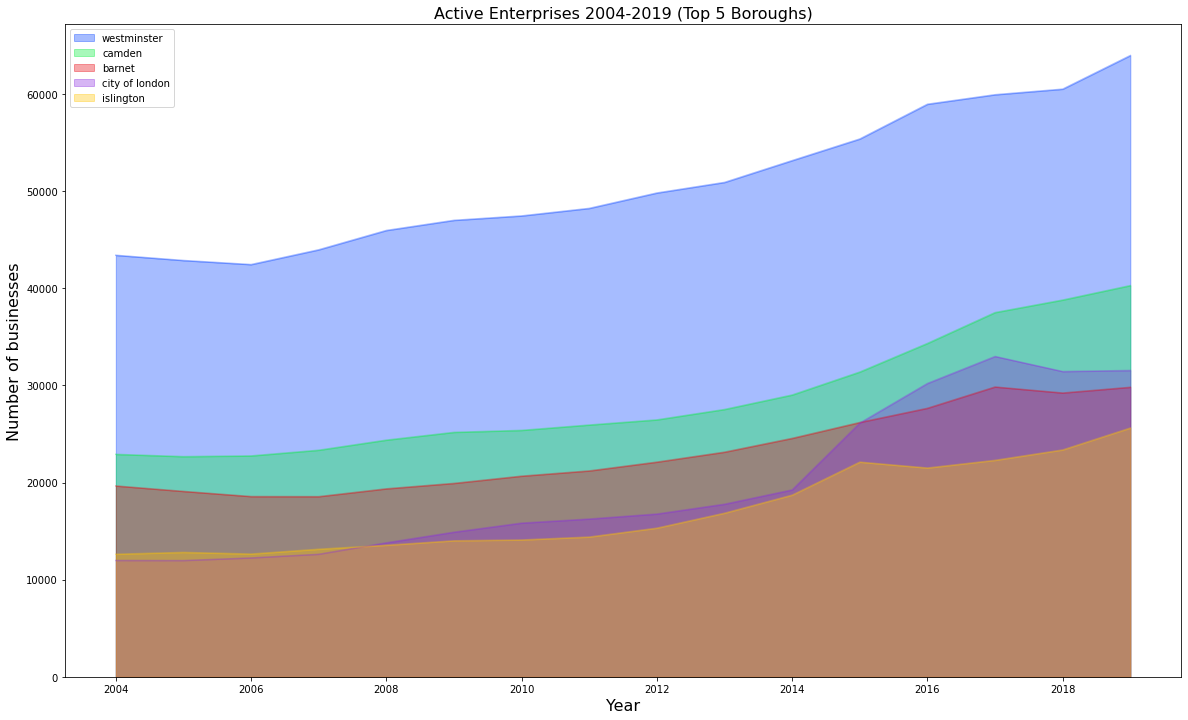

In [93]:
trends.iloc[:-1,:5].plot(kind='area', stacked=False, alpha=0.35, figsize=(20,12))
plt.title('Active Enterprises 2004-2019 (Top 5 Boroughs)', size=16)
plt.ylabel('Number of businesses', size=16)
plt.xlabel('Year', size=16)
plt.show()

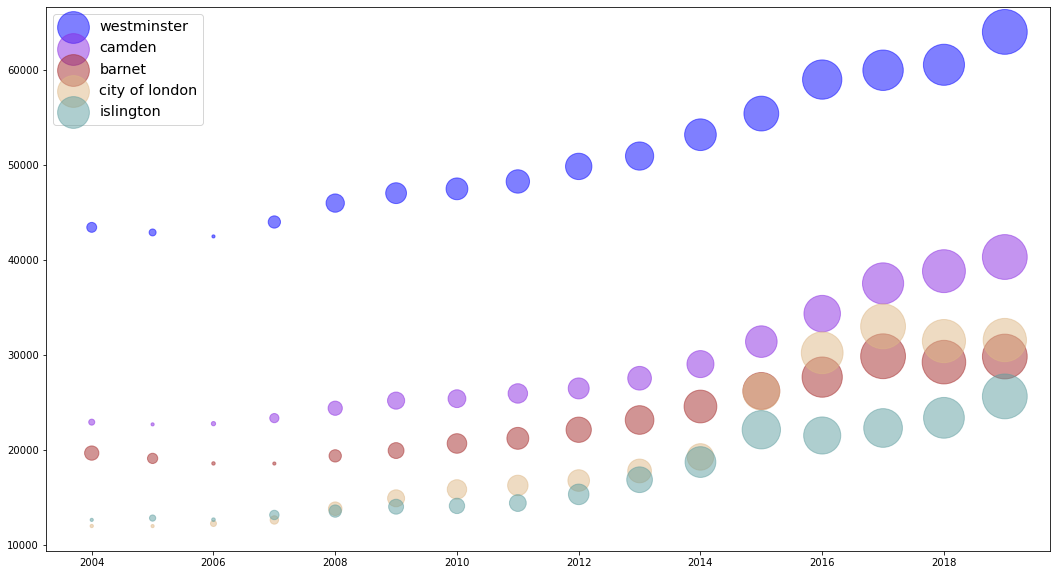

In [94]:
trends.reset_index(inplace=True)  # index is the 'year' so needs to be reset
trends = trends.iloc[:-1,:]       # 'Total' row cut off
plt.figure(figsize=(18,10))
for i,col in enumerate(trends.iloc[:,1:6]):
    color = list(mpl.colors.cnames.keys())[i + 9]
    scaled = (trends[col] - trends[col].min()) / (trends[col].max() - trends[col].min())
    plt.scatter(x='index',
                y=col,
                data=trends,
                alpha=0.5,
                color=color,
                s=scaled * 2000 + 10,
                )
    
plt.legend(trends.iloc[:,1:6].columns, loc='upper left', fontsize='x-large')

#### ACTIVE ENTERPRISES IN 2019

In [95]:
active_2019 = pd.DataFrame(index=business_dem['area'].unique())
active_2019['ActiveEnterprises'] = list(year_group.get_group(2019))

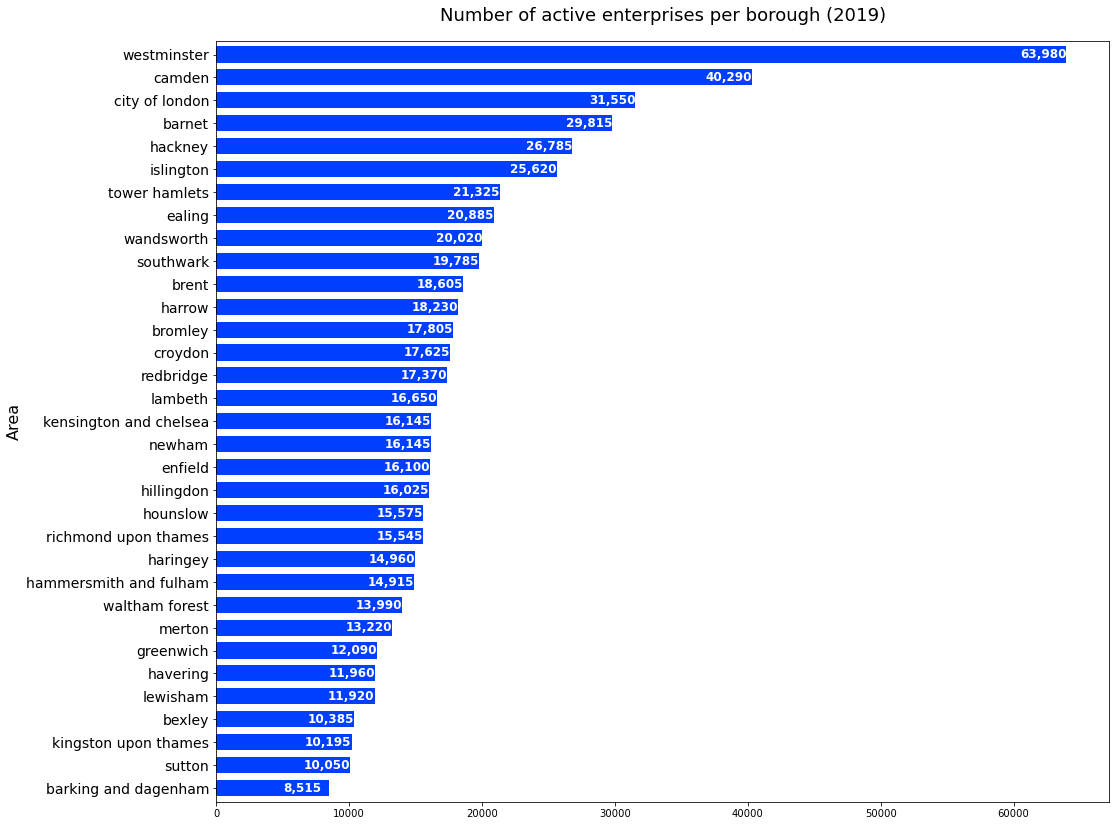

In [96]:
plt.figure(figsize=(16,14))
active_2019['ActiveEnterprises'].sort_values(ascending=True).round(decimals=0).plot(kind='barh', width=0.7)
for i, val in enumerate(active_2019['ActiveEnterprises'].sort_values(ascending=True).round(decimals=0)):
    label = format(int(val), ',')
    plt.annotate(label, xy=(val - 3500, i - 0.15), color='white', fontweight='bold', fontsize=12)
    
plt.title('Number of active enterprises per borough (2019)', size=18,pad=20)
plt.yticks(size=14)
plt.ylabel('Area',size=16)
plt.show()

#### DEATHS OF ENTERPRISES

In [97]:
# Creating new dataframe from names of groups and data of groups
trends = pd.DataFrame(index=business_dem['area'].unique())
year_group = business_dem.groupby('year')['deaths']
for name, group in year_group:
    trends[name] = list(group)
trends['Total'] = trends.sum(axis=1)
trends.sort_values(by='Total', ascending=False, inplace=True)
trends = trends.T
trends

westminster  camden  barnet  city of london  islington  wandsworth  \
2004          5635    2775    3015            1160       1685        1860   
2005          5455    2370    2675            1000       1480        1865   
2006          4110    2130    2315             940       1280        1650   
2007          5465    2655    2650            1705       1450        1590   
2008          4425    2205    2345            1095       1295        1625   
2009          6045    3040    2980            1365       1720        2270   
2010          5185    2640    2795            1435       1655        1840   
2011          4705    2445    2650            1590       1385        1575   
2012          5205    2890    3035            1655       1590        1840   
2013          4845    2610    2865            1515       1645        1700   
2014          4840    2630    2855            1640       1985        1840   
2015          6305    3415    3410            2270       4090        2180   
2016          6595    3645    3420            3485       2645        2400   
2017          8445    5480    4770            7395       2975        2835   
2018          7300    4655    4185            5650       2880        2515   
2019          1740    5470    3835            5750       1425        1025   
Total        86300   51055   49800           39650      31185       30610   

       lambeth  tower hamlets  ealing  hackney  ...  hillingdon  \
2004      1355           1400    1780     1280  ...        1130   
2005      1235           1275    1640     1115  ...        1060   
2006      1125           1185    1445      945  ...         925   
2007      1175           1265    1460     1105  ...         990   
2008      1210           1260    1500      985  ...        1000   
2009      1695           1740    1935     1535  ...        1295   
2010      1375           1540    1605     1230  ...        1125   
2011      1130           1330    1455     1075  ...        1030   
2012      1550           1680    1665     1345  ...        1265   
2013      2325           1710    1665     1255  ...        1215   
2014      3345           1945    1795     1550  ...        1270   
2015      2620           2450    2065     2025  ...        1450   
2016      2220           2705    2205     2340  ...        1560   
2017      2690           2980    2490     3170  ...        1895   
2018      2095           2965    2470     3160  ...        1830   
2019      3015           2255    2405     3620  ...        1925   
Total    30160          29685   29580    27735  ...       20965   

       waltham forest  havering  newham  lewisham  greenwich  \
2004             1065       920     820       845        745   
2005             1005       815     785       775        720   
2006              905       830     625       830        695   
2007              900       790     695       800        685   
2008              930       800     730       750        740   
2009             1070      1065    1015      1130        970   
2010             1060       975    1005      1005        895   
2011              975       845     840       865        775   
2012             1090       980    1085       995        915   
2013             1110       940    1140       975        925   
2014             1210      1015    1240      1140       1020   
2015             1320      1085    1450      1290       1200   
2016             1460      1250    1675      1295       1230   
2017             1850      1470    2035      1700       1655   
2018             1710      1410    2175      1450       1475   
2019             1675      3460    1315      2475       1485   
Total           19335     18650   18630     18320      16130   

       kingston upon thames  bexley  sutton  barking and dagenham  
2004                    885     800     780                   410  
2005                    765     755     730                   395  
2006                    655     730     660             

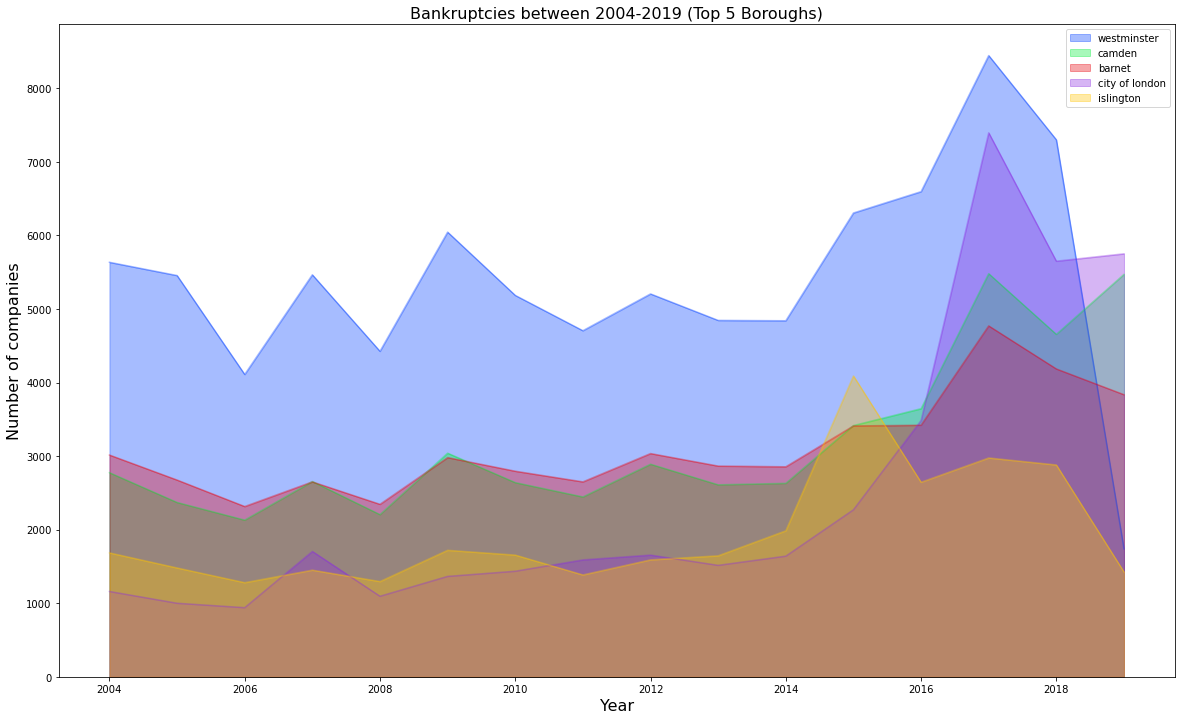

In [98]:
trends.iloc[:-1,:5].plot(kind='area', stacked=False, alpha=0.35, figsize=(20,12))
plt.title('Bankruptcies between 2004-2019 (Top 5 Boroughs)', size=16)
plt.ylabel('Number of companies', size=16)
plt.xlabel('Year', size=16)
plt.show()

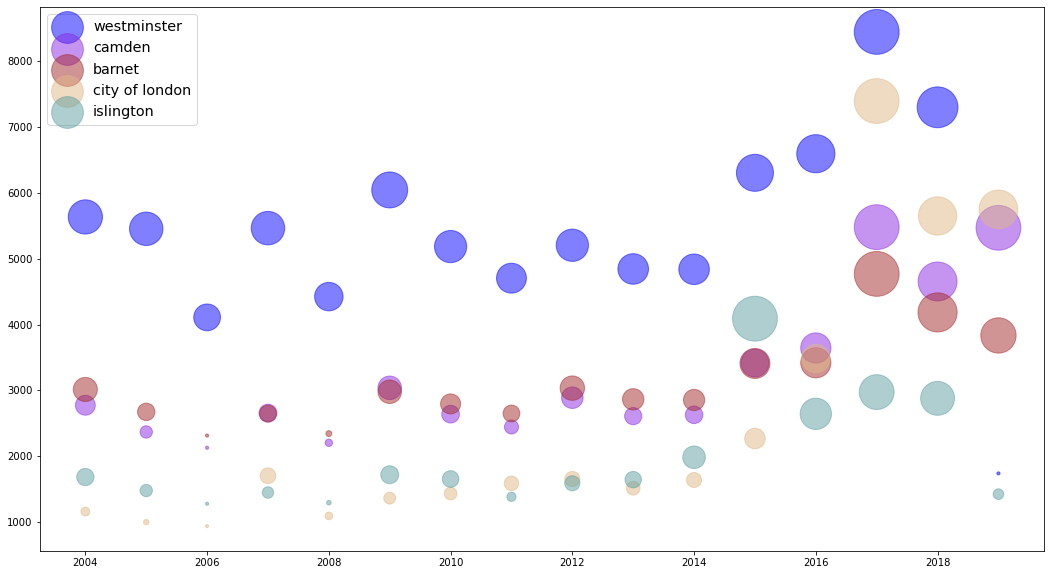

In [50]:
trends.reset_index(inplace=True)  # index is the 'year' so needs to be reset
trends = trends.iloc[:-1,:]       # 'Total' row cut off
plt.figure(figsize=(18,10))
for i,col in enumerate(trends.iloc[:,1:6]):
    color = list(mpl.colors.cnames.keys())[i + 9]
    scaled = (trends[col] - trends[col].min()) / (trends[col].max() - trends[col].min())
    plt.scatter(x='index',
                y=col,
                data=trends,
                alpha=0.5,
                color=color,
                s=scaled * 2000 + 10,
                )
    
plt.legend(trends.iloc[:,1:6].columns, loc='upper left', fontsize='x-large')

#### BANKRUPTCIES IN 2019

In [51]:
deaths_2019 = pd.DataFrame(index=business_dem['area'].unique())
deaths_2019['Bankruptcies'] = list(year_group.get_group(2019))

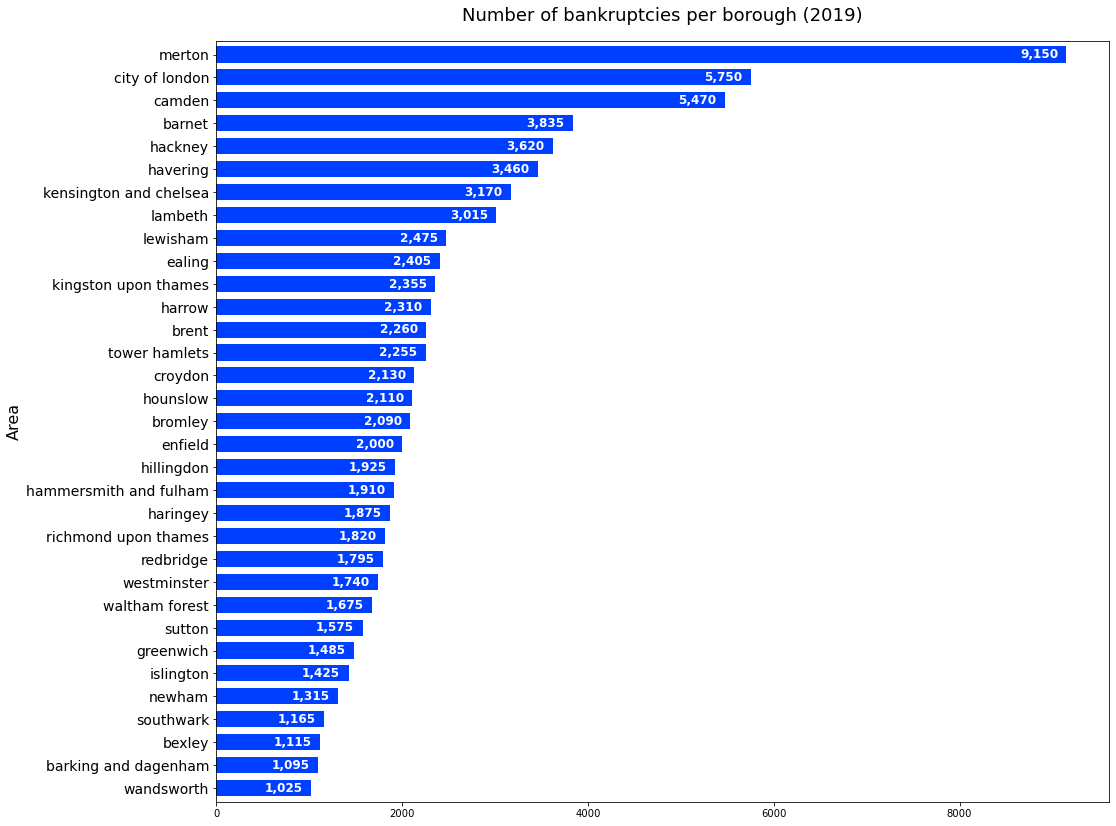

In [52]:
plt.figure(figsize=(16,14))
deaths_2019['Bankruptcies'].sort_values(ascending=True).round(decimals=0).plot(kind='barh', width=0.7)
for i, val in enumerate(deaths_2019['Bankruptcies'].sort_values(ascending=True).round(decimals=0)):
    label = format(int(val), ',')
    plt.annotate(label, xy=(val - 500, i - 0.15), color='white', fontweight='bold', fontsize=12)
    
plt.title('Number of bankruptcies per borough (2019)', size=18,pad=20)
plt.yticks(size=14)
plt.ylabel('Area',size=16)
plt.show()

#### SIZE OF BUSINESSES

In [99]:
size = business_size
size.head(5)

Area  Total  Micro 0-4  Small 5-9  Small 10-19  \
0        City of London  24020      16775       2840         2040   
1  Barking and Dagenham   7225       6160        575          280   
2                Barnet  24615      21220       1930          860   
3                Bexley   8930       7490        760          360   
4                 Brent  15890      13350       1395          650   

   Medium 20-49  Medium 50-99  MediumLarge 100-249  Large 250-499  \
0          1120           580                  360            125   
1           120            50                   30              5   
2           350           130                   90             15   
3           190            70                   40             10   
4           285           100                   65             25   

   Big 500-999  Corporation 1000&up  
0           85                   90  
1            0                    5  
2           10                   10  
3            5                    5  
4           10                   10

In [100]:
del size['Total']
small = size.iloc[:,:4]
small['Total'] = small.sum(axis=1)
small.set_index('Area',inplace=True)
small.head()

Micro 0-4  Small 5-9  Small 10-19  Total
Area                                                          
City of London            16775       2840         2040  21655
Barking and Dagenham       6160        575          280   7015
Barnet                    21220       1930          860  24010
Bexley                     7490        760          360   8610
Brent                     13350       1395          650  15395

In [101]:
stacked=pd.DataFrame(index=small.index)
for i,n in enumerate(small.iloc[:,:-1]):
        stacked[n] = small[n] / small['Total']
stacked.sort_values(by='Micro 0-4', ascending=False, inplace=True)
stacked.head()

Micro 0-4  Small 5-9  Small 10-19
Area                                             
Lewisham         0.898213   0.068520     0.033267
Greenwich        0.896979   0.067360     0.035661
Merton           0.889646   0.073569     0.036785
Harrow           0.889186   0.076331     0.034483
Waltham Forest   0.888793   0.077586     0.033621

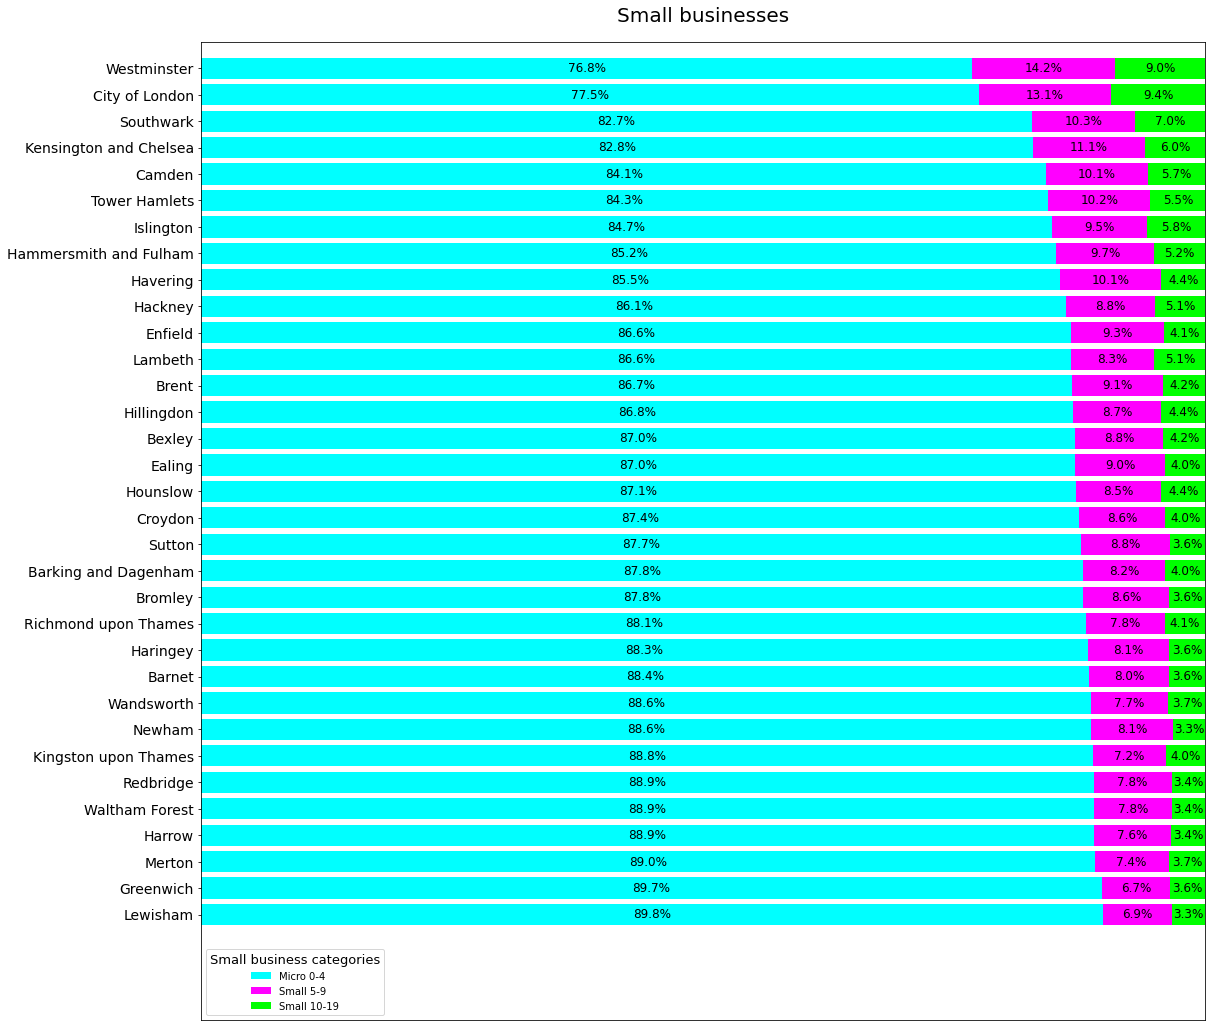

In [102]:
# 110pct stacked bar chart
left = len(stacked) * [0]
# colors = ['aqua', 'fuchsia', 'lime', 'dodgerblue', 'yellow', 'tomato', 'salmon', 'orange', 'teal']
colors = ['aqua', 'fuchsia', 'lime']
fig, ax = plt.subplots(1, figsize=(18,18))
for i, col in enumerate(stacked.columns):
    plt.barh(stacked.index, stacked[col], left=left, color=colors[i])
    left = left + stacked[col]
    
for n in stacked:
    for i, (cs, ab) in enumerate(zip(stacked.cumsum(1)[n], stacked[n])):
        plt.text(cs - ab / 2, i, str(np.round(ab * 100,1)) + '%', 
                                 va = 'center', ha = 'center',c='black', fontsize=12) 
        
plt.ylim(-4, ax.get_yticks()[-1] + 1)
plt.xlim(0.0, plt.xlim()[1] - 0.05)
plt.yticks(ticks=stacked.index, labels=stacked.index, size=14)
plt.xticks([])
plt.legend(stacked.columns,title='Small business categories', loc='lower left', title_fontsize=13)
plt.title('Small businesses',size=20, pad=20)
plt.show()

In [103]:
medium = size[['Area','Medium 20-49','Medium 50-99','MediumLarge 100-249']]
medium['Total'] = medium.sum(axis=1)
medium.set_index('Area',inplace=True)
medium.head()

<ipython-input-103-b9940c18190b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['Total'] = medium.sum(axis=1)


Medium 20-49  Medium 50-99  MediumLarge 100-249  Total
Area                                                                        
City of London                1120           580                  360   2060
Barking and Dagenham           120            50                   30    200
Barnet                         350           130                   90    570
Bexley                         190            70                   40    300
Brent                          285           100                   65    450

In [104]:
stacked=pd.DataFrame(index=medium.index)
for i,n in enumerate(medium.iloc[:,:-1]):
        stacked[n] = medium[n] / medium['Total']
stacked.sort_values(by='Medium 20-49', ascending=False, inplace=True)
stacked.head()

Medium 20-49  Medium 50-99  MediumLarge 100-249
Area                                                           
Waltham Forest      0.714286      0.163265             0.122449
Haringey            0.714286      0.178571             0.107143
Lambeth             0.705357      0.196429             0.098214
Redbridge           0.703704      0.203704             0.092593
Lewisham            0.690476      0.190476             0.119048

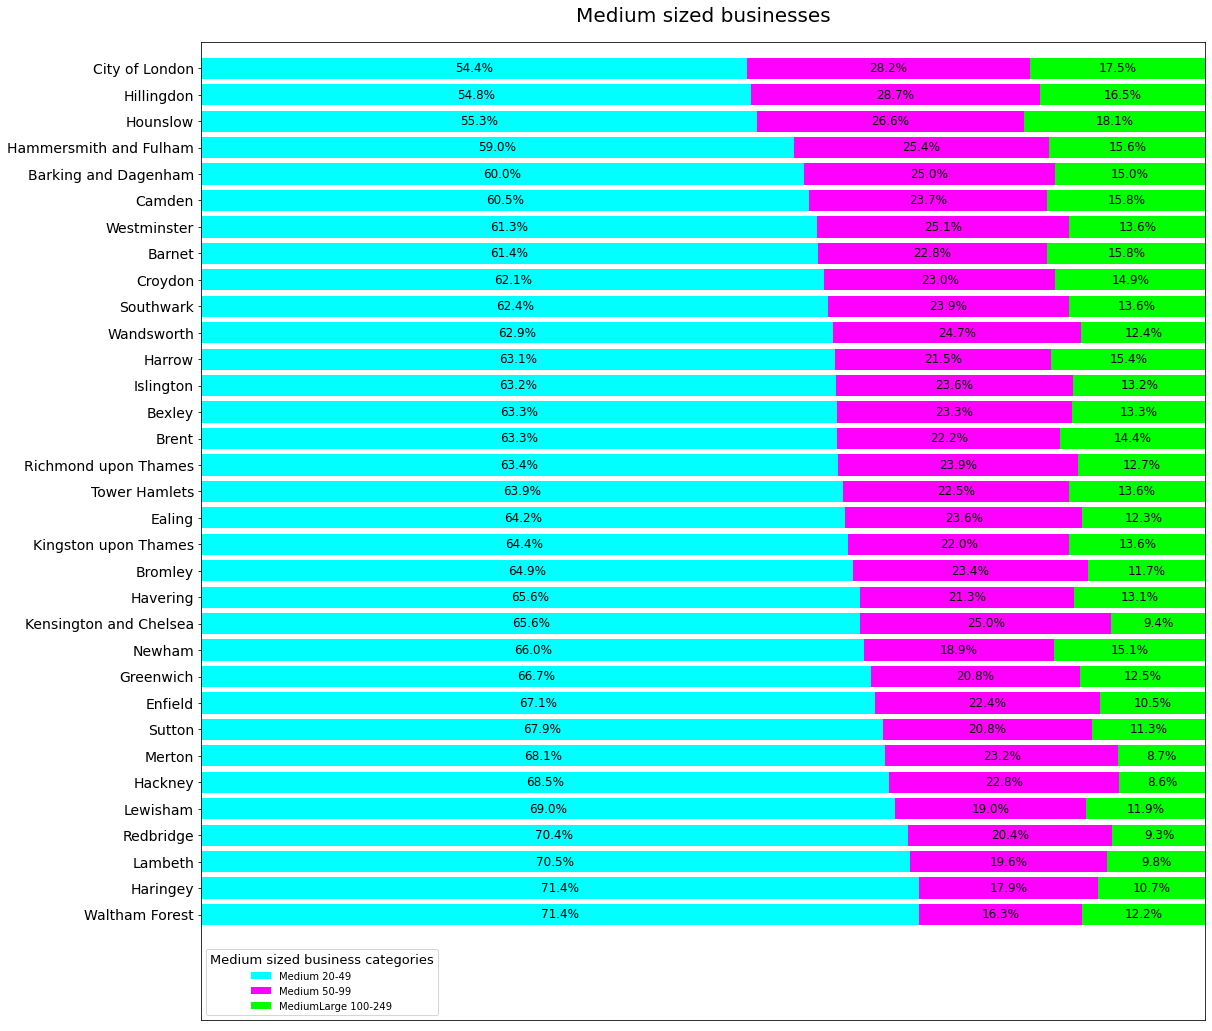

In [105]:
left = len(stacked) * [0]
# colors = ['aqua', 'fuchsia', 'lime', 'dodgerblue', 'yellow', 'tomato', 'salmon', 'orange', 'teal']
colors = ['aqua', 'fuchsia', 'lime']
fig, ax = plt.subplots(1, figsize=(18,18))
for i, col in enumerate(stacked.columns):
    plt.barh(stacked.index, stacked[col], left=left, color=colors[i])
    left = left + stacked[col]
    
for n in stacked:
    for i, (cs, ab) in enumerate(zip(stacked.cumsum(1)[n], stacked[n])):
        plt.text(cs - ab / 2, i, str(np.round(ab * 100,1)) + '%', 
                                 va = 'center', ha = 'center',c='black', fontsize=12) 
        
plt.ylim(-4, ax.get_yticks()[-1] + 1)
plt.xlim(0.0, plt.xlim()[1] - 0.05)
plt.yticks(ticks=stacked.index, labels=stacked.index, size=14)
plt.xticks([])
plt.legend(stacked.columns,title='Medium sized business categories', loc='lower left', title_fontsize=13)
plt.title('Medium sized businesses',size=20, pad=20)
plt.show()

In [106]:
large = size[['Area','Large 250-499','Big 500-999','Corporation 1000&up']]
large['Total'] = large.sum(axis=1)
large.set_index('Area',inplace=True)
large.head()

<ipython-input-106-1969682d1a70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large['Total'] = large.sum(axis=1)


Large 250-499  Big 500-999  Corporation 1000&up  Total
Area                                                                        
City of London                  125           85                   90    300
Barking and Dagenham              5            0                    5     10
Barnet                           15           10                   10     35
Bexley                           10            5                    5     20
Brent                            25           10                   10     45

In [107]:
stacked=pd.DataFrame(index=large.index)
for i,n in enumerate(large.iloc[:,:-1]):
        stacked[n] = large[n] / large['Total']
stacked.sort_values(by='Large 250-499', ascending=False, inplace=True)
stacked.head()

Large 250-499  Big 500-999  Corporation 1000&up
Area                                                           
Waltham Forest       1.000000     0.000000             0.000000
Enfield              0.666667     0.333333             0.000000
Havering             0.600000     0.200000             0.200000
Newham               0.571429     0.285714             0.142857
Brent                0.555556     0.222222             0.222222

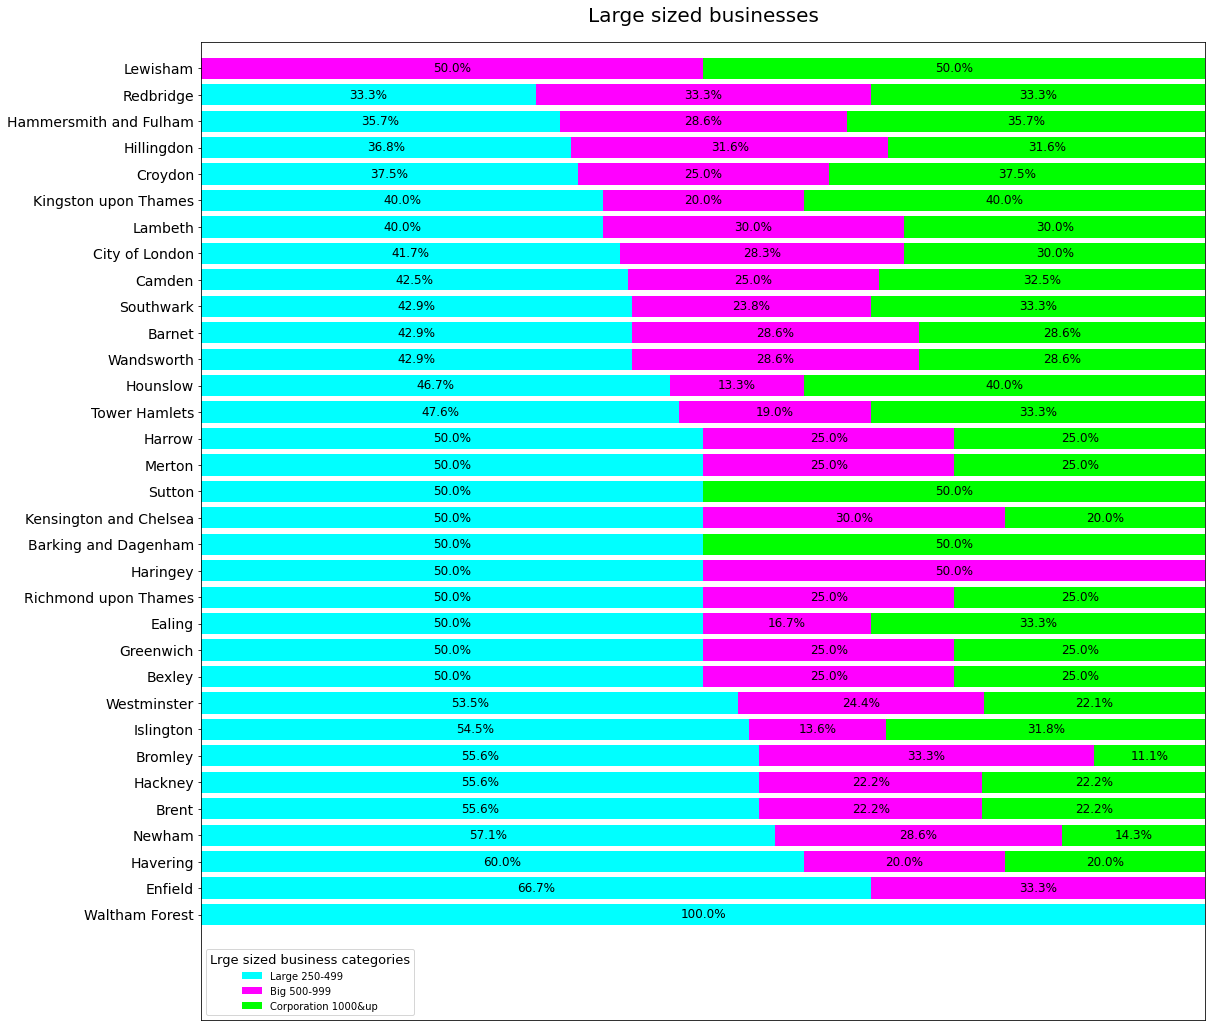

In [112]:
left = len(stacked) * [0]
# colors = ['aqua', 'fuchsia', 'lime', 'dodgerblue', 'yellow', 'tomato', 'salmon', 'orange', 'teal']
colors = ['aqua', 'fuchsia', 'lime']
fig, ax = plt.subplots(1, figsize=(18,18))
for i, col in enumerate(stacked.columns):
    plt.barh(stacked.index, stacked[col], left=left, color=colors[i])
    left = left + stacked[col]
    
for n in stacked:
    for i, (cs, ab) in enumerate(zip(stacked.cumsum(1)[n], stacked[n])):
        pos = cs - ab / 2
        string = '' if ab == 0  else str(np.round(ab * 100,1)) + '%'
        plt.text(pos, i, string, va = 'center', ha = 'center',c='black', fontsize=12) 
        
plt.ylim(-4, ax.get_yticks()[-1] + 1)
plt.xlim(0.0, plt.xlim()[1])
plt.yticks(ticks=stacked.index, labels=stacked.index, size=14)
plt.xticks([])
plt.legend(stacked.columns,title='Lrge sized business categories', loc='lower left', title_fontsize=13)
plt.title('Large sized businesses',size=20, pad=20)
plt.show()

#### SURVIVAL RATES

In [63]:
survival['area'].unique()

array(['City of London', 'Barking and Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'North East', 'North West',
       'Yorkshire And The Humber', 'East Midlands', 'West Midlands',
       'East', 'London', 'South East', 'South West', 'England', 'Wales',
       'Scotland', 'Northern Ireland', 'England And Wales',
       'Great Britain', 'United Kingdom'], dtype=object)

In [64]:
not_ldn = ['Inner London',
       'Outer London', 'North East', 'North West',
       'Yorkshire And The Humber', 'East Midlands', 'West Midlands',
       'East', 'London', 'South East', 'South West', 'England', 'Wales',
       'Scotland', 'Northern Ireland', 'England And Wales',
       'Great Britain', 'United Kingdom']
filt = survival['area'].isin(not_ldn)
survival = survival.loc[~filt]

In [65]:
survival.set_index('area', inplace=True)
survival.head()

year  1_year_survival_number  1_year_survival_rate
area                                                                    
City of London        2018                    3950                  75.6
Barking and Dagenham  2018                    1415                  93.1
Barnet                2018                    3410                  84.4
Bexley                2018                    1205                  92.7
Brent                 2018                    2580                  89.4

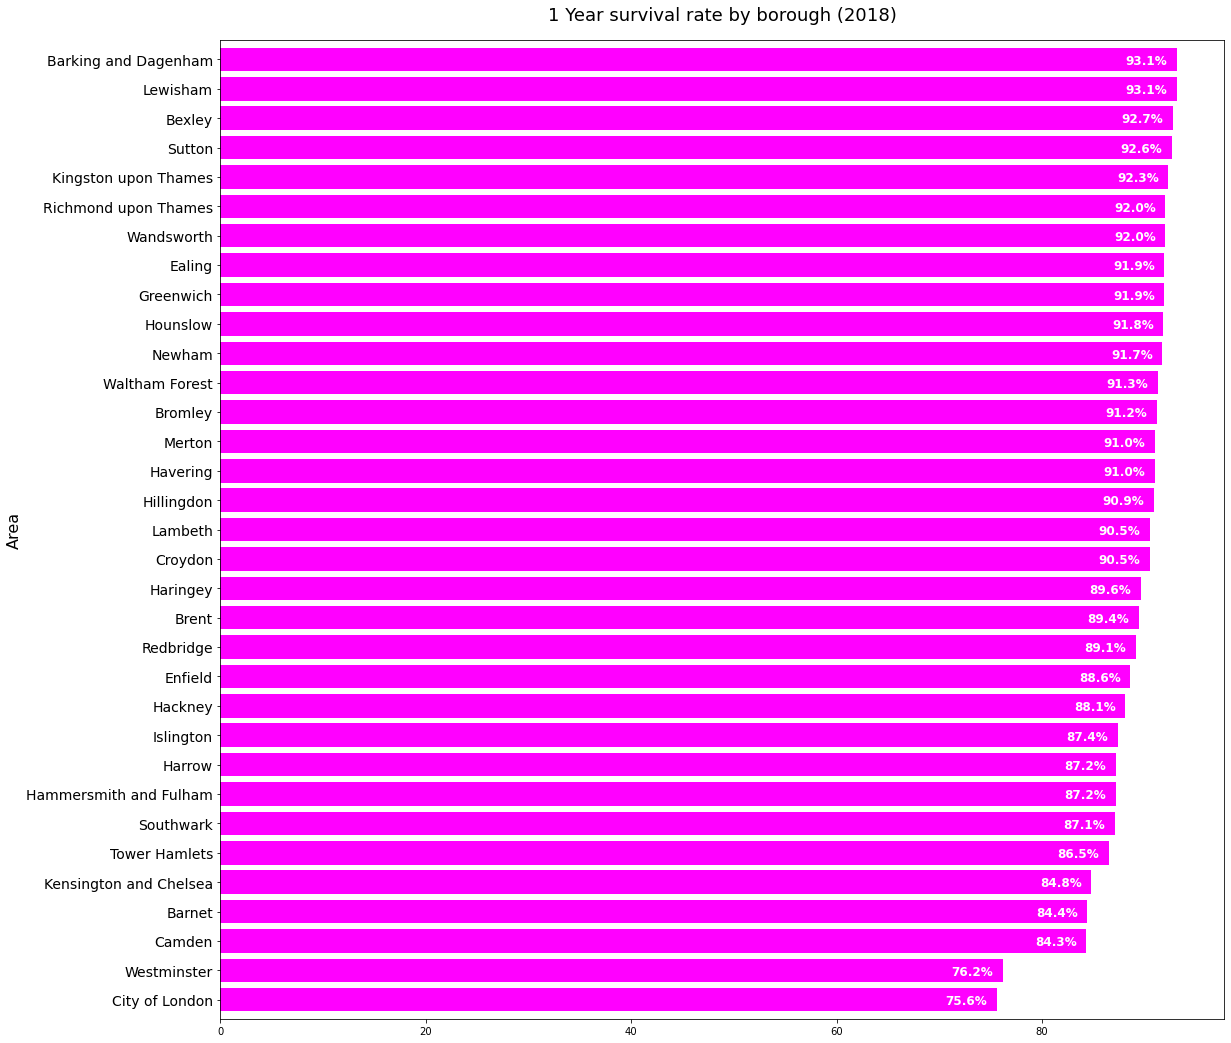

In [66]:
plt.figure(figsize=(18,18))
survival['1_year_survival_rate'].sort_values(ascending=True).round(decimals=1).plot(kind='barh', width=0.8, color='fuchsia')
for i, val in enumerate(survival['1_year_survival_rate'].sort_values(ascending=True).round(decimals=1)):
    label = str(val) + '%'
    plt.annotate(label, xy=(val - 5, i - 0.15), color='white', fontweight='bold', fontsize=12)
    
plt.title('1 Year survival rate by borough (2018)', size=18,pad=20)
plt.yticks(size=14)
plt.ylabel('Area',size=16)
plt.show()

#### Employment demographics

In [67]:
emp.head()

Total Employees                                 \
                   Area          number denominator percent confidence   
0        City of London          7400.0      7400.0   100.0        0.0   
1  Barking and Dagenham         79900.0     95800.0    83.4        4.4   
2                Barnet        153900.0    191500.0    80.3        4.6   
3                Bexley         97400.0    118600.0    82.2        4.0   
4                 Brent        125000.0    160800.0    77.7        5.6   

  Total Self-employed                                Full time employees  ...  \
               number denominator percent confidence              number  ...   
0                 0.0      7400.0     0.0        0.0              7400.0  ...   
1             15900.0     95800.0    16.6        4.4             71700.0  ...   
2             34800.0    191500.0    18.2        4.4            147000.0  ...   
3             20800.0    118600.0    17.5        3.9             91900.0  ...   
4             35200.0    160800.0    21.9        5.6            125600.0  ...   

  Males part time            Females full time                                 \
          percent confidence            number denominator percent confidence   
0             0.0        0.0               0.0         0.0     0.0        0.0   
1             7.4        4.3           23700.0     44000.0    53.9        8.3   
2            12.4        5.4           59000.0     91200.0    64.8        7.8   
3             7.6        3.9           36800.0     58100.0    63.3        7.0   
4            14.4        6.8           46900.0     68900.0    68.2        8.7   

  Females part time                                 
             number denominator percent confidence  
0               0.0         0.0     0.0        0.0  
1           20300.0     44000.0    46.1        8.3  
2           32100.0     91200.0    35.2        7.8  
3           21300.0     58100.0    36.7        7.0  
4           21900.0     68900.0    31.8        8.7  

[5 rows x 33 columns]

In [68]:
emp.columns

MultiIndex([(                   '',        'Area'),
            (    'Total Employees',      'number'),
            (    'Total Employees', 'denominator'),
            (    'Total Employees',     'percent'),
            (    'Total Employees',  'confidence'),
            ('Total Self-employed',      'number'),
            ('Total Self-employed', 'denominator'),
            ('Total Self-employed',     'percent'),
            ('Total Self-employed',  'confidence'),
            ('Full time employees',      'number'),
            ('Full time employees', 'denominator'),
            ('Full time employees',     'percent'),
            ('Full time employees',  'confidence'),
            ('Part time employees',      'number'),
            ('Part time employees', 'denominator'),
            ('Part time employees',     'percent'),
            ('Part time employees',  'confidence'),
            (    'Males full time',      'number'),
            (    'Males full time', 'denominator'),
            

In [69]:
status = pd.DataFrame()
status['Area'] = emp[('','Area')]
status['Total Employees'] = emp[('Total Employees','number')]
status['Total SelfEmployed'] = emp[('Total Self-employed','number')]
status['Full time'] = emp[('Full time employees','number')]
status['Part time'] = emp[('Part time employees','number')]
status['Male full time'] = emp[('Males full time','number')]
status['Male part time'] = emp[('Males part time','number')]
status['Female full time'] = emp[('Females full time','number')]
status['Female part time'] = emp[('Females part time','number')]
status.head()

Area  Total Employees  Total SelfEmployed  Full time  \
0        City of London           7400.0                 0.0     7400.0   
1  Barking and Dagenham          79900.0             15900.0    71700.0   
2                Barnet         153900.0             34800.0   147000.0   
3                Bexley          97400.0             20800.0    91900.0   
4                 Brent         125000.0             35200.0   125600.0   

   Part time  Male full time  Male part time  Female full time  \
0        0.0          4800.0             0.0               0.0   
1    24100.0         48000.0          3800.0           23700.0   
2    44600.0         87900.0         12400.0           59000.0   
3    25900.0         55100.0          4600.0           36800.0   
4    35200.0         78700.0         13200.0           46900.0   

   Female part time  
0               0.0  
1           20300.0  
2           32100.0  
3           21300.0  
4           21900.0

### Full time employment per gender

In [70]:
full_time = status[['Area', 'Full time', 'Male full time', 'Female full time']]
full_time.drop(index=full_time[full_time['Area'] == 'City of London'].index, inplace=True)
full_time.set_index('Area', inplace=True)
full_time.head()

/Users/robertczikkel/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Full time  Male full time  Female full time
Area                                                             
Barking and Dagenham    71700.0         48000.0           23700.0
Barnet                 147000.0         87900.0           59000.0
Bexley                  91900.0         55100.0           36800.0
Brent                  125600.0         78700.0           46900.0
Bromley                129100.0         79400.0           49700.0

In [71]:
stacked=pd.DataFrame(index=full_time.index)
for i,n in enumerate(full_time.iloc[:,1:]):
        stacked[n] = full_time[n] / full_time['Full time']
stacked.sort_values(by='Male full time', ascending=False, inplace=True)
stacked.head()

Male full time  Female full time
Area                                                  
Redbridge                   0.670381          0.329619
Newham                      0.669876          0.330124
Barking and Dagenham        0.669456          0.330544
Tower Hamlets               0.655907          0.344093
Hounslow                    0.650187          0.349813

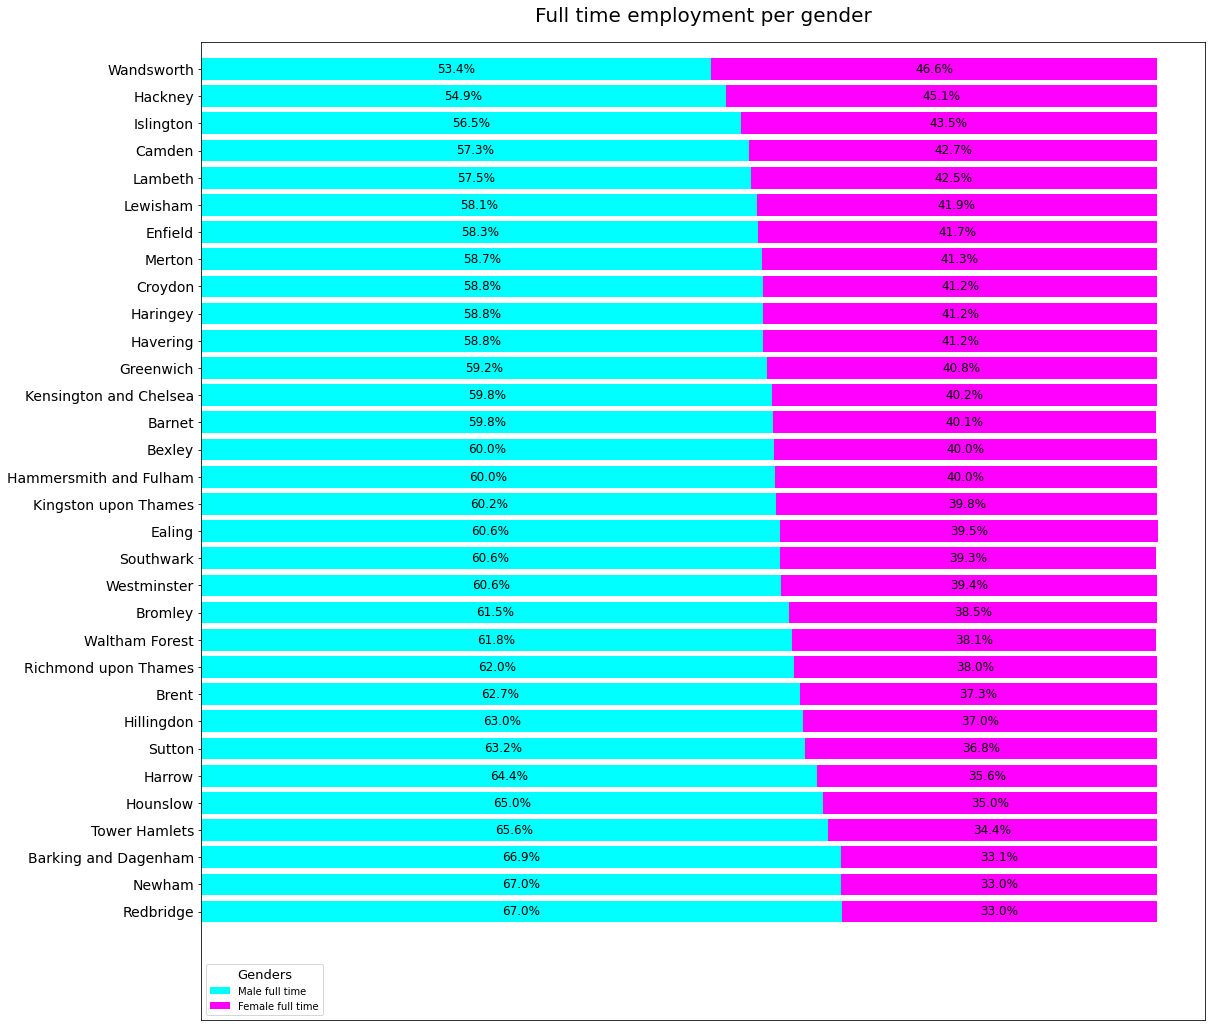

In [72]:
left = len(stacked) * [0]
# colors = ['aqua', 'fuchsia', 'lime', 'dodgerblue', 'yellow', 'tomato', 'salmon', 'orange', 'teal']
colors = ['aqua', 'fuchsia']
fig, ax = plt.subplots(1, figsize=(18,18))
for i, col in enumerate(stacked.columns):
    plt.barh(stacked.index, stacked[col], left=left, color=colors[i])
    left = left + stacked[col]
    
for n in stacked:
    for i, (cs, ab) in enumerate(zip(stacked.cumsum(1)[n], stacked[n])):
        plt.text(cs - ab / 2, i, str(np.round(ab * 100,1)) + '%', 
                                 va = 'center', ha = 'center',c='black', fontsize=12) 
        
plt.ylim(-4, ax.get_yticks()[-1] + 1)
plt.xlim(0.0, plt.xlim()[1])
plt.yticks(ticks=stacked.index, labels=stacked.index, size=14)
plt.xticks([])
plt.legend(stacked.columns,title='Genders', loc='lower left', title_fontsize=13)
plt.title('Full time employment per gender',size=20, pad=20)
plt.show()

### Part time employment by gender

In [73]:
parttime = status[['Area', 'Part time', 'Male part time', 'Female part time']]
parttime.drop(index=parttime[parttime['Area'] == 'City of London'].index, inplace=True)
parttime.set_index('Area', inplace=True)
parttime.head()

/Users/robertczikkel/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Part time  Male part time  Female part time
Area                                                             
Barking and Dagenham    24100.0          3800.0           20300.0
Barnet                  44600.0         12400.0           32100.0
Bexley                  25900.0          4600.0           21300.0
Brent                   35200.0         13200.0           21900.0
Bromley                 37300.0          7700.0           29600.0

In [77]:
stacked=pd.DataFrame(index=parttime.index)
for i,n in enumerate(parttime.iloc[:,1:]):
        stacked[n] = parttime[n] / parttime['Part time']
stacked.sort_values(by='Male part time', ascending=False, inplace=True)
stacked.head()

Male part time  Female part time
Area                                           
Tower Hamlets        0.495575          0.500000
Ealing               0.465625          0.534375
Camden               0.446154          0.553846
Islington            0.424242          0.575758
Hackney              0.386431          0.616519

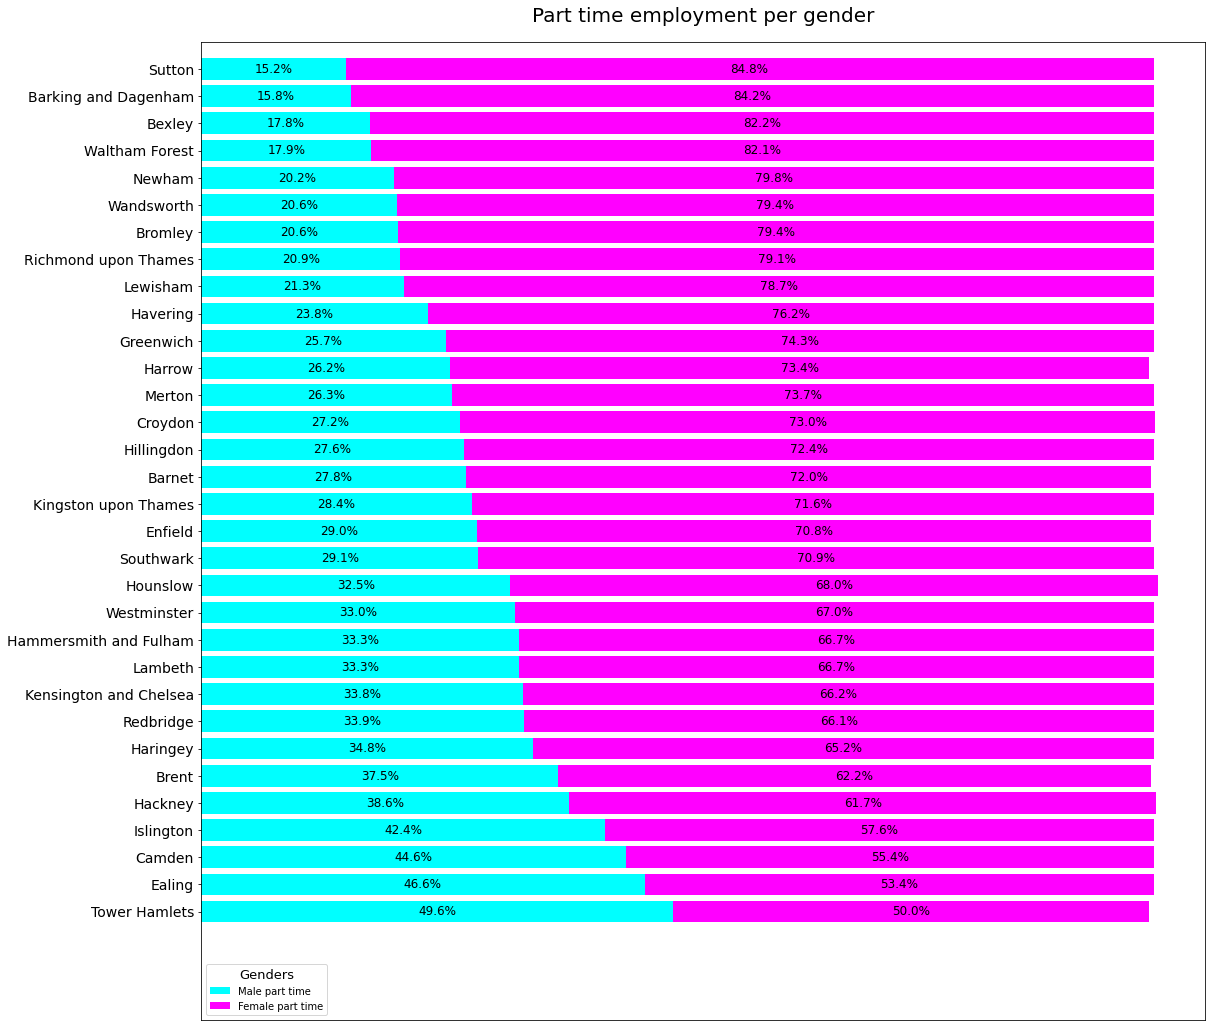

In [78]:
left = len(stacked) * [0]
# colors = ['aqua', 'fuchsia', 'lime', 'dodgerblue', 'yellow', 'tomato', 'salmon', 'orange', 'teal']
colors = ['aqua', 'fuchsia']
fig, ax = plt.subplots(1, figsize=(18,18))
for i, col in enumerate(stacked.columns):
    plt.barh(stacked.index, stacked[col], left=left, color=colors[i])
    left = left + stacked[col]
    
for n in stacked:
    for i, (cs, ab) in enumerate(zip(stacked.cumsum(1)[n], stacked[n])):
        plt.text(cs - ab / 2, i, str(np.round(ab * 100,1)) + '%', 
                                 va = 'center', ha = 'center',c='black', fontsize=12) 
        
plt.ylim(-4, ax.get_yticks()[-1] + 1)
plt.xlim(0.0, plt.xlim()[1])
plt.yticks(ticks=stacked.index, labels=stacked.index, size=14)
plt.xticks([])
plt.legend(stacked.columns,title='Genders', loc='lower left', title_fontsize=13)
plt.title('Part time employment per gender',size=20, pad=20)
plt.show()